In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn import linear_model
%matplotlib inline
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
df_housing = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")

In [3]:
df_housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [4]:
from sklearn.model_selection import train_test_split
df_housing_train, df_housing_test = train_test_split(df_housing,test_size=.3)

In [5]:
df_housing_train['Propertycount_perc'] = df_housing_train.Propertycount.apply(lambda x: 1 / x)
df_housing_test['Propertycount_perc'] = df_housing_test.Propertycount.apply(lambda x: 1 / x)

c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
df_housing_train.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Propertycount_perc
3820,St Albans,14 Horham Ct,4,h,NaN,SN,Barry,3/06/2017,3021,Western Metropolitan,14042,14.0,Brimbank City Council,0.000071
22856,South Kingsville,84 Kernot St,4,h,NaN,W,Gunn&Co,12/08/2017,3015,Western Metropolitan,984,6.2,Hobsons Bay City Council,0.001016
2700,Fitzroy North,25 Liverpool St,4,h,1780000.0,S,Jellis,3/03/2018,3068,Northern Metropolitan,6244,3.6,Moreland City Council,0.000160
4697,Greenvale,10 Hawick Ct,5,h,NaN,PI,Barry,3/09/2017,3059,Northern Metropolitan,4864,20.4,Hume City Council,0.000206
8609,Cremorne,43 Chestnut St,3,h,1245000.0,S,hockingstuart,6/01/2018,3121,Northern Metropolitan,1123,2.4,Yarra City Council,0.000890


In [7]:
df_housing_train['Date'] = pd.to_datetime(df_housing_train.Date)
df_housing_test['Date'] = pd.to_datetime(df_housing_test.Date)

c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
# look at overall time trends, trends by year, by month
df_housing_train['year'] = df_housing_train['Date'].dt.year
df_housing_train['month'] = df_housing_train['Date'].dt.month
df_housing_train['month_year'] = df_housing_train['Date'].apply(lambda x: x.strftime('%B-%Y'))   

df_housing_test['year'] = df_housing_test['Date'].dt.year
df_housing_test['month'] = df_housing_test['Date'].dt.month
df_housing_test['month_year'] = df_housing_test['Date'].apply(lambda x: x.strftime('%B-%Y'))   

c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [9]:
df_trend = df_housing_train.groupby(['month_year'],as_index=False).mean()

In [10]:
df_trend.month_year.unique()

array(['April-2016', 'April-2017', 'April-2018', 'August-2016',
       'August-2017', 'August-2018', 'December-2016', 'December-2017',
       'December-2018', 'February-2017', 'February-2018', 'January-2016',
       'January-2017', 'January-2018', 'July-2016', 'July-2017',
       'July-2018', 'June-2016', 'June-2017', 'June-2018', 'March-2016',
       'March-2017', 'March-2018', 'May-2016', 'May-2017', 'May-2018',
       'November-2016', 'November-2017', 'November-2018', 'October-2016',
       'October-2017', 'October-2018', 'September-2016', 'September-2017',
       'September-2018'], dtype=object)

In [11]:
month_year_order = ['January-2016','February-2016','March-2016','April-2016', 'May-2016', 'June-2016','July-2016', 
                    'August-2016', 'September-2016', 'October-2016', 'November-2016', 'December-2016',
                    'January-2017', 'February-2017','March-2017', 'April-2017','May-2017', 'June-2017','July-2017',
                    'August-2017', 'September-2017','October-2017', 'November-2017','December-2017',
                    'January-2018','February-2018','March-2018', 'April-2018', 'May-2018','June-2018','July-2018',
                    'August-2018','September-2018','October-2018','November-2018', 'December-2018']

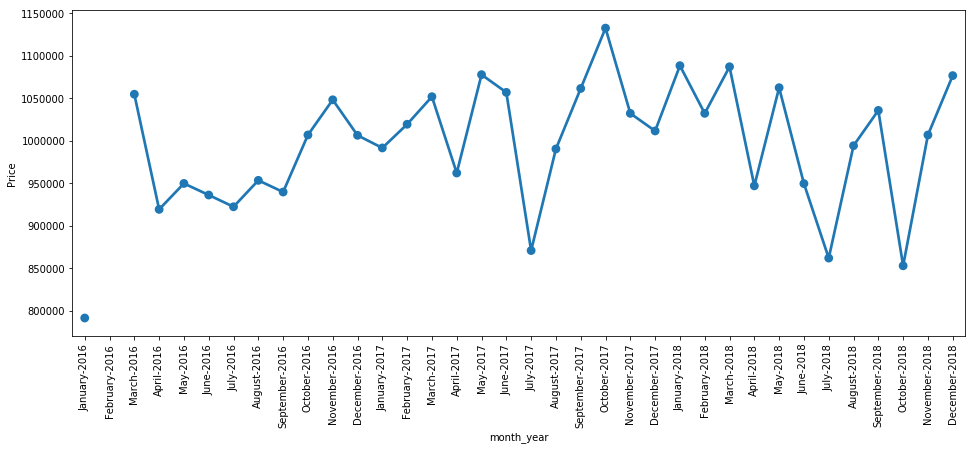

In [12]:
plt.figure(figsize=(16,6))
sns.pointplot(x='month_year', y='Price', data=df_trend,order=month_year_order)
plt.xticks(rotation=90)
plt.show()

In [13]:
df_trend_year = df_housing_train.groupby(['year'],as_index=False).mean()

In [14]:
df_housing_train[['year','Price']].groupby('year').agg([np.mean,np.std])

Price               
              mean            std
year                             
2016  9.696972e+05  581993.964875
2017  1.025304e+06  618501.685217
2018  9.956643e+05  568087.352051

In [15]:
df_housing_train['log_Price'] = df_housing_train.Price.apply(lambda x: np.log(x))
df_housing_test['log_Price'] = df_housing_test.Price.apply(lambda x: np.log(x))

c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


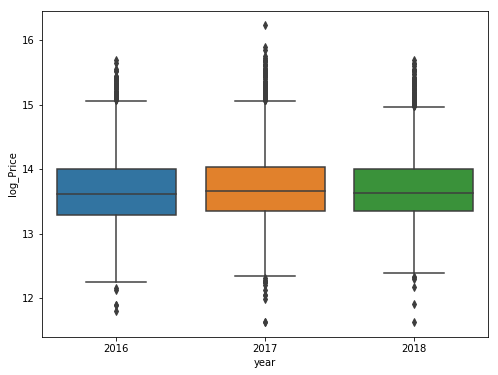

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(x='year', y='log_Price', data=df_housing_train)
plt.show()

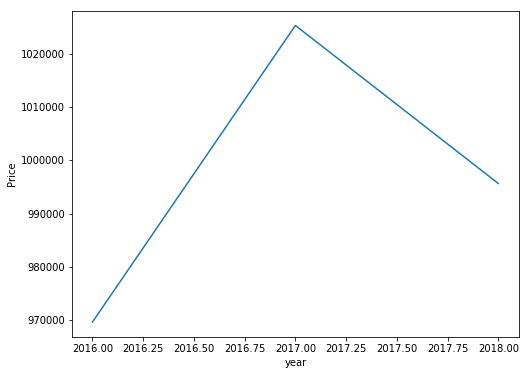

In [17]:
plt.figure(figsize=(8,6))
sns.lineplot(x='year', y='Price', data=df_trend_year)
plt.show()

It seems year doesn't matter!

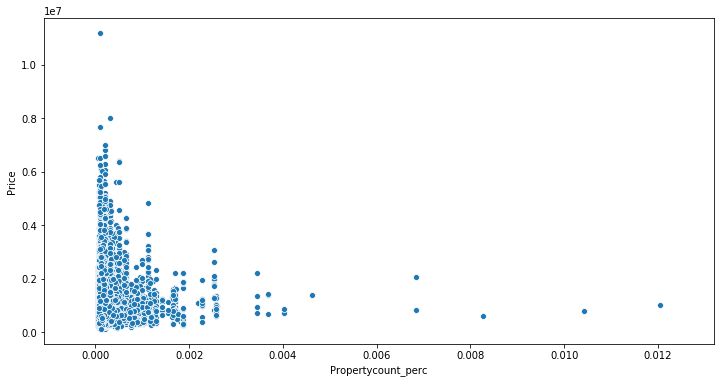

In [18]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Propertycount_perc', y='Price', data=df_housing_train)
plt.show()

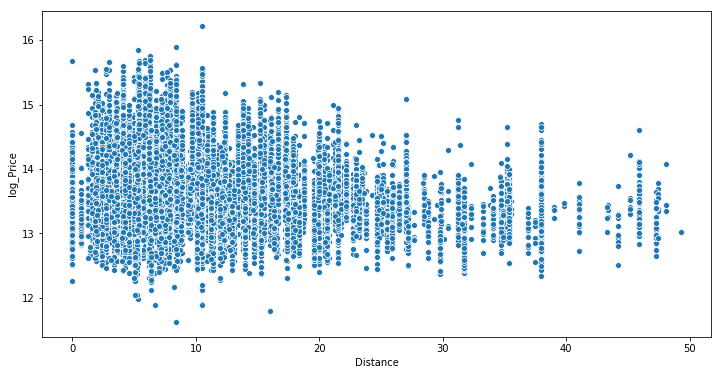

In [19]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Distance', y='log_Price', data=df_housing_train)
plt.show()

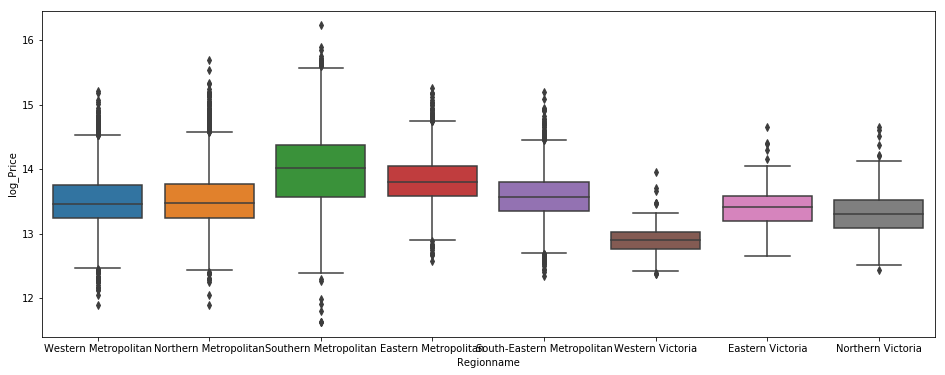

In [20]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Regionname', y='log_Price', data=df_housing_train)
plt.show()

In [21]:
df_suburb = df_housing_train[['Suburb','Price']].groupby(['Suburb']).mean()

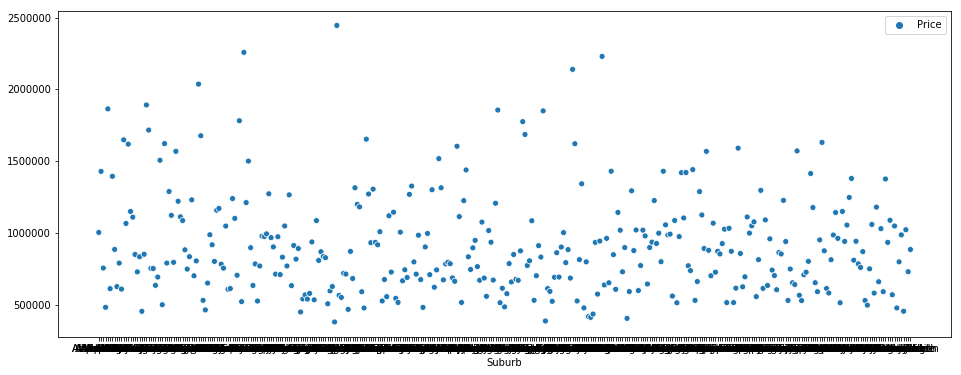

In [22]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=df_suburb)
plt.show()

In [23]:
df_housing_train.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Propertycount_perc,year,month,month_year,log_Price
3820,St Albans,14 Horham Ct,4,h,NaN,SN,Barry,2017-03-06,3021,Western Metropolitan,14042,14.0,Brimbank City Council,0.000071,2017,3,March-2017,NaN
22856,South Kingsville,84 Kernot St,4,h,NaN,W,Gunn&Co,2017-12-08,3015,Western Metropolitan,984,6.2,Hobsons Bay City Council,0.001016,2017,12,December-2017,NaN
2700,Fitzroy North,25 Liverpool St,4,h,1780000.0,S,Jellis,2018-03-03,3068,Northern Metropolitan,6244,3.6,Moreland City Council,0.000160,2018,3,March-2018,14.392124
4697,Greenvale,10 Hawick Ct,5,h,NaN,PI,Barry,2017-03-09,3059,Northern Metropolitan,4864,20.4,Hume City Council,0.000206,2017,3,March-2017,NaN
8609,Cremorne,43 Chestnut St,3,h,1245000.0,S,hockingstuart,2018-06-01,3121,Northern Metropolitan,1123,2.4,Yarra City Council,0.000890,2018,6,June-2018,14.034646


In [24]:
df_housing_train.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea', 'Propertycount_perc', 'year', 'month', 'month_year',
       'log_Price'],
      dtype='object')

In [25]:
df_housing_train = df_housing_train.dropna(subset=['log_Price'])
df_housing_test = df_housing_test.dropna(subset=['log_Price'])

### Log price model

In [26]:
X_train = df_housing_train[['Rooms', 'Type', 'Method', 'Regionname', 'Distance','Propertycount_perc','month']]
Y_train = df_housing_train['log_Price']
X_train = pd.get_dummies(X_train)

In [27]:
X_test = df_housing_test[['Rooms', 'Type', 'Method', 'Regionname', 'Distance','Propertycount_perc','month']]
Y_test = df_housing_test['log_Price']
X_test = pd.get_dummies(X_test)

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

0.6430090950013825

In [29]:
y_pred = lr.predict(X_test)

In [31]:
df_coeff = pd.DataFrame(lr.coef_, X_train.columns, columns=['Coefficient'])  
df_coeff  

,Coefficient
Rooms,0.205865
Distance,-0.036873
Propertycount_perc,9.945252
month,0.000850
Type_h,0.218996
Type_t,0.050388
Type_u,-0.269384
Method_PI,-0.022759
Method_S,0.024019
Method_SA,-0.004554


In [32]:
from sklearn import metrics  
print('Mean Absolute Error: %.5f' % metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error: %.5f' % metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error: %.5f' % np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))  

Mean Absolute Error: 0.22885
Mean Squared Error: 0.08792
Root Mean Squared Error: 0.29652


In [33]:
df_housing_train.log_Price.describe()

count    33896.000000
mean        13.684200
std          0.497474
min         11.626254
25%         13.337475
50%         13.635187
75%         14.016817
max         16.231424
Name: log_Price, dtype: float64

In [35]:
y_pred

array([14.02465704, 13.60559918, 13.42580579, ..., 13.59647783,
       13.81695624, 13.50922348])

In [37]:
# unlog predictions and then get MSE / RMSE
y_pred_e = np.exp(y_pred)

In [39]:
print('Mean Absolute Error: %.1f' % metrics.mean_absolute_error(df_housing_test['Price'], y_pred_e))  
print('Mean Squared Error: %.1f' % metrics.mean_squared_error(df_housing_test['Price'], y_pred_e))  
print('Root Mean Squared Error: %.1f' % np.sqrt(metrics.mean_squared_error(df_housing_test['Price'], y_pred_e)))  

Mean Absolute Error: 234006.0
Mean Squared Error: 158397253284.8
Root Mean Squared Error: 397991.5


### Price (no log) model

In [40]:
X_train2 = df_housing_train[['Rooms', 'Type', 'Method', 'Regionname', 'Distance','Propertycount_perc','month']]
Y_train2 = df_housing_train['Price']
X_train2 = pd.get_dummies(X_train2)

In [41]:
X_test2 = df_housing_test[['Rooms', 'Type', 'Method', 'Regionname', 'Distance','Propertycount_perc','month']]
Y_test2 = df_housing_test['Price']
X_test2 = pd.get_dummies(X_test2)

In [42]:
from sklearn.linear_model import LinearRegression

lr2 = LinearRegression()
lr2.fit(X_train2, Y_train2)
lr2.score(X_test2, Y_test2)

0.5298080124119537

In [43]:
y_pred2 = lr.predict(X_test2)

In [44]:
print('Mean Absolute Error: %.1f' % metrics.mean_absolute_error(Y_test2, y_pred2))  
print('Mean Squared Error: %.1f' % metrics.mean_squared_error(Y_test2, y_pred2))  
print('Root Mean Squared Error: %.1f' % np.sqrt(metrics.mean_squared_error(Y_test2, y_pred2))) 

Mean Absolute Error: 990703.6
Mean Squared Error: 1333005442293.3
Root Mean Squared Error: 1154558.5


In [45]:
df_housing_train.Price.describe()

count    3.389600e+04
mean     1.000978e+06
std      5.937356e+05
min      1.120000e+05
25%      6.200000e+05
50%      8.350000e+05
75%      1.223000e+06
max      1.120000e+07
Name: Price, dtype: float64

Using the log price is a much better model than using the straight price, even when unlogging the log price values and comparing them to the price only model.

### Influence plot

In [46]:
" + ".join(df_housing_train.columns)

'Suburb + Address + Rooms + Type + Price + Method + SellerG + Date + Postcode + Regionname + Propertycount + Distance + CouncilArea + Propertycount_perc + year + month + month_year + log_Price'

In [47]:
from statsmodels.formula.api import ols
ols_model = ols(formula='Y_train ~ X_train',data=df_housing_train)
ols_model.fit()

In [50]:
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(ols_model, ax=ax, criterion="cooks")